<a href="https://colab.research.google.com/github/mohammed-lafi1035/DS230_final_Project_AE/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Required libraries

In [7]:
import pandas as pd   #(data frame)هي المكتبة الأساسية الي رح تتعامل مع الجداول
import numpy as np # تُستخدم للعمليات الحسابية والرياضية الموجودة بالمصفوفات
import os # تُستخدم للتعامل مع نظام التشغيل
import gc #  وظيفتها الأساسية هي تفريغ الذاكرة لانه البيانات كبيرة الحجم(RAM) يدوياً من البيانات التي لم تعد بحاجة إليها
import matplotlib.pyplot as plt # هي المكتبة الأم للرسم البياني في بايثون.
import seaborn as sns


### **نستدعي جميع المكتبات المطلوبة للتمكن من اتمام جميع المهام**

## Reading CSV files

In [8]:
orders=pd.read_csv('/content/orders.csv')
products=pd.read_csv('/content/products.csv')
departments=pd.read_csv('/content/departments.csv')
aisles=pd.read_csv('/content/aisles.csv')
prior=pd.read_csv('/content/order_products__prior.csv')
train=pd.read_csv('/content/order_products__train.csv')



### **(CSV)قراءة جميع المفات بصيغة**

### Reduce the memory size for all files

In [9]:
def reduce_mem_usage_simple(df):

    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:

            if str(col_type) in ['category', 'datetime64[ns]']:
                continue

            c_min = df[col].min()
            c_max = df[col].max()
#(int 8)او (int 16) و(int 32) الي (int 64) هسه هون الكود رح يمر على جميع الاعمدة و بتحقق من جميع القيم و يحول الارقام من
            if 'int' in str(col_type):

                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)


            elif 'float' in str(col_type):
                df[col] = df[col].astype(np.float16)

        else:

            if len(df[col].unique()) / len(df) < 0.5:
                df[col] = df[col].astype('category')


    return df

orders = reduce_mem_usage_simple(orders)
products = reduce_mem_usage_simple(products)
departments = reduce_mem_usage_simple(departments)
aisles = reduce_mem_usage_simple(aisles)
prior = reduce_mem_usage_simple(prior)
train = reduce_mem_usage_simple(train)
print("To ensure the area is reduced to less than int64\n",orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   eval_set                category
 3   order_number            int8    
 4   order_dow               int8    
 5   order_hour_of_day       int8    
 6   days_since_prior_order  float16 
dtypes: category(1), float16(1), int32(2), int8(3)
memory usage: 45.7 MB
To ensure the area is reduced to less than int (64)
 None


### (RAM)الهدف الرئيسي من الكود هو التقليل المساحة التي تشغلها البيانات في الذاكرة المؤقتة

### "memory-savvy joins"هذه الخطوة ضرورية جداً لتنفيذ الـ

## Merge files into one file

In [10]:
# (pandas) من مكتبة (pd) استخدمنا
m1 = pd.merge(prior, orders, on="order_id", how="left")
m2 = pd.merge(m1, products, on="product_id", how="left")
m3 = pd.merge(m2, departments, on="department_id", how="left")
instacart_data = pd.merge(m3, aisles, on="aisle_id", how="left")


del m1, m2, m3, prior, products, departments, aisles
gc.collect()

instacart_data = reduce_mem_usage_simple(instacart_data)




# Missing value analysis

/tmp/ipython-input-732298478.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Column', y='Missing_Percentage', data=missing_df, palette='Reds_r')


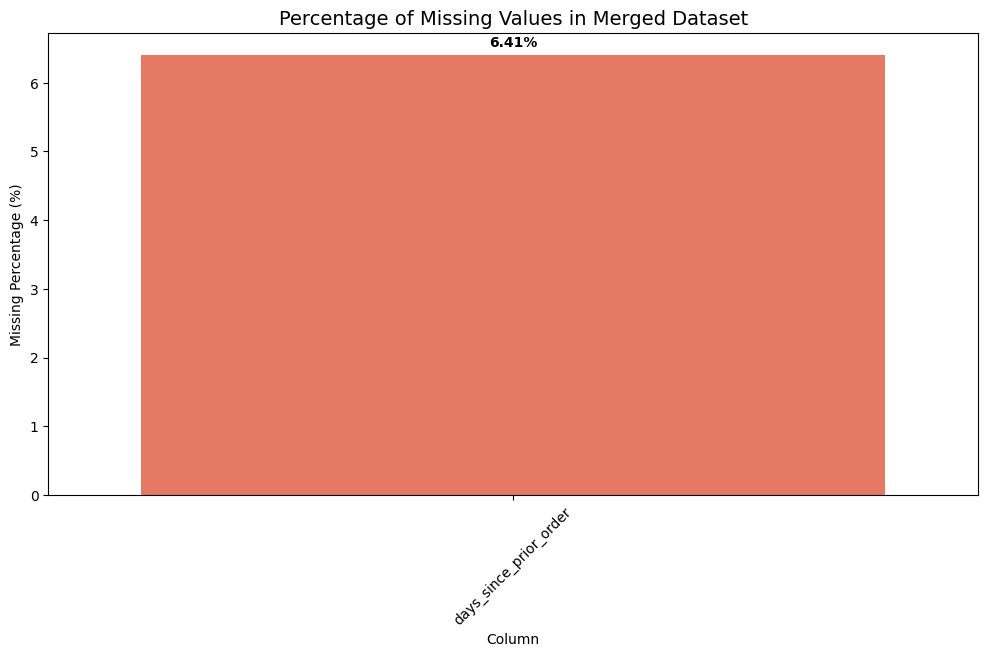

Missing values details:
                   Column  Missing_Count  Missing_Percentage
9  days_since_prior_order        2078068             6.40697


In [11]:




missing_count = instacart_data.isnull().sum()
missing_pct = (missing_count / len(instacart_data)) * 100


missing_df = pd.DataFrame({
    'Column': missing_count.index,
    'Missing_Count': missing_count.values,
    'Missing_Percentage': missing_pct.values
})


missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values(by='Missing_Percentage', ascending=False)

if not missing_df.empty:

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Column', y='Missing_Percentage', data=missing_df, palette='Reds_r')


    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f') + '%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9), textcoords = 'offset points',
                    fontsize=10, fontweight='bold')

    plt.title('Percentage of Missing Values in Merged Dataset', fontsize=14)
    plt.ylabel('Missing Percentage (%)')
    plt.xticks(rotation=45)
    plt.show()

    print("Missing values details:")
    print(missing_df)
else:
    print("No missing values found in the merged dataset!")

# Temporal Features

/tmp/ipython-input-6828485.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=instacart_data, x='order_hour_of_day', palette='viridis')


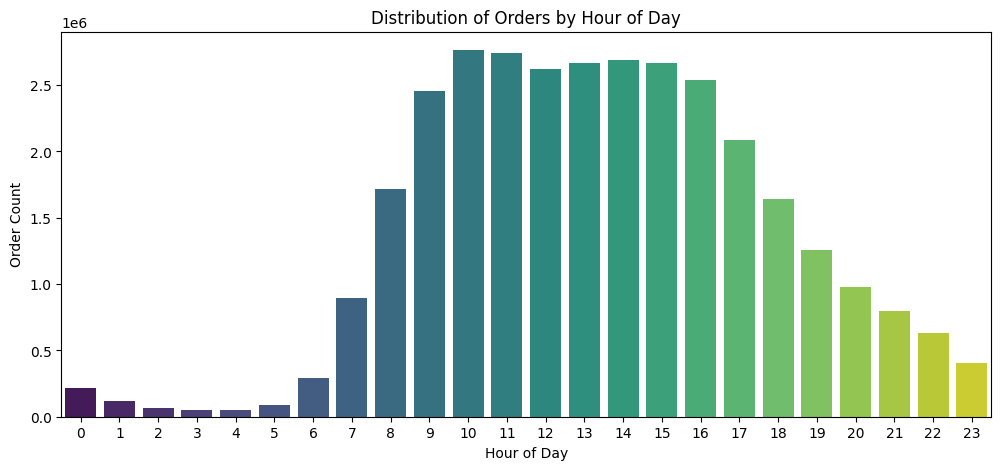

/tmp/ipython-input-6828485.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=instacart_data, x='order_dow', palette='magma')


In [ ]:


plt.figure(figsize=(12, 5))
sns.countplot(data=instacart_data, x='order_hour_of_day', palette='viridis')
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Order Count')
plt.show()


plt.figure(figsize=(10, 5))
sns.countplot(data=instacart_data, x='order_dow', palette='magma')
plt.title('Distribution of Orders by Day of Week')
plt.xlabel('Day of Week (0-6)')
plt.ylabel('Order Count')
plt.show()


plt.figure(figsize=(12, 5))
sns.histplot(instacart_data['days_since_prior_order'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Days Since Prior Order')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()


top_products = instacart_data['product_name'].value_counts().head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='rocket')
plt.title('Top 15 Most Ordered Products')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.show()